#Reading data

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [73]:
file=pd.read_csv("C:\\Users\\SaiKiran\\Downloads\\15_variable_identification\\data.csv")

In [74]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
file.shape

(891, 12)

In [76]:
file.dtypes
#identify Catogorial and cont datatypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
#Survived= Target variable
#Rest others=Predictor variables


# Univariate Analysis for Continuos variables

In [78]:
file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


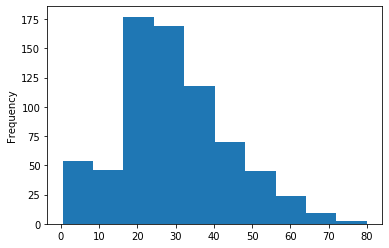

In [79]:
#Plotting the histogram of age
file['Age'].plot.hist()

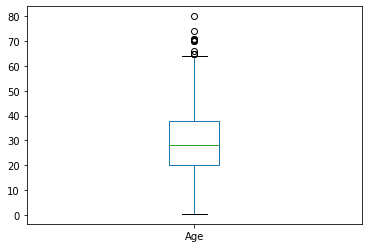

In [80]:
#Plotting a boxplot
file['Age'].plot.box()

In [81]:
pd.file['Age'].hist()

AttributeError: module 'pandas' has no attribute 'file'

# Univariate Analysis for catogarial variables

In [114]:
file['Sex'].value_counts()

male      451
female    260
Name: Sex, dtype: int64

In [ ]:
#Creating percentages from frequency
file['Sex'].value_counts()/len(file['Sex'])

In [ ]:
file['Sex'].value_counts().plot.bar()

In [ ]:
(file['Sex'].value_counts()/len(file['Sex'])).plot.bar()

# Bivariate Analysis

# Continuous - Cont. Bivariate Analysis

In [ ]:
file.plot.scatter('Age','Fare')

In [ ]:
file.corr()

In [115]:
#For two variables
file['Age'].corr(file['Fare'])

0.10941523295484004

# Categorial - Cont Bivariate Analysis

In [ ]:
#Tabular representation
file.groupby('Sex')['Age'].mean()

In [ ]:
#Graphical
file.groupby('Sex')['Age'].mean().plot.bar()

In [ ]:
#T test analysis
#Scipy library for ttest
from scipy.stats import ttest_ind

In [ ]:
males=file[file['Sex']=='male']

In [ ]:
females=file[file['Sex']=='female']

In [ ]:
ttest_ind(males['Age'],females['Age'],nan_policy='omit')
#To omit for any missing data

# Catogerial - Cat Relation

In [ ]:
#Two way table
pd.crosstab(file['Sex'],file['Survived'])

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(pd.crosstab(file['Sex'],file['Survived']))

# Identifying missing Values

In [ ]:
file.describe()

In [ ]:
#age has missing values but describe() only accounts for continuous variables

In [ ]:
#For all avriables identifying missing values in df
file.isnull()
#Boolean values True for missing

In [95]:
file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          528
Embarked         2
dtype: int64

In [ ]:
#177 missing values in the Age column...

In [97]:
#Dropping all rows where there are any missing values
file.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [99]:
#Dropping all rows where there are any missing values
file.dropna(axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
#To verify

In [ ]:
file.dropna().isnull().sum()

In [ ]:
#To modify the original file
#  file = file.dropna()

In [ ]:
#drop rows where all the values are missing
file.dropna(how='all')

In [ ]:
#Size
file.dropna(how='all').shape

In [96]:
#Dropping columns with any missing values
file.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [ ]:
#Size
file.dropna(axis=1).shape

In [ ]:
#Dropping columns with all missing values
file.dropna(axis=1,how='all')

In [ ]:
#Size
file.dropna(axis=1,how='all').shape

# Filling missing Values

In [ ]:
#Filling all missing values in Df with 0
file.fillna(0)

In [ ]:
#To modify the original file and give youthe output
#file.fillna(0,inplace=True)

In [ ]:
# Particular col with 0
file['Age'].fillna(0)

In [ ]:
#Imputing (filling) with mean of the age
file['Age'].fillna(file['Age'].mean())

In [ ]:
file['Age'].fillna(file['Age'].median())

In [ ]:
file['Age'].fillna(file['Age'].mode())

# Univariate outlier Detection

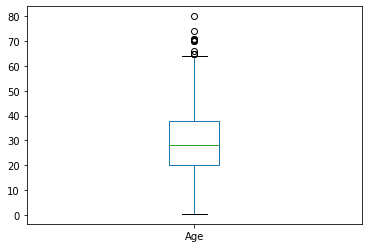

In [82]:
file['Age'].plot.box()

# Bivariate Outlier Detection

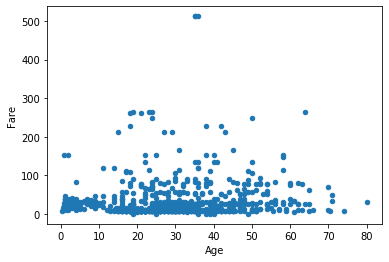

In [83]:
file.plot.scatter('Age','Fare')

# Removing Outliers from the dataset

In [86]:
#Removing fare above 300
file=file[file['Fare']<300]

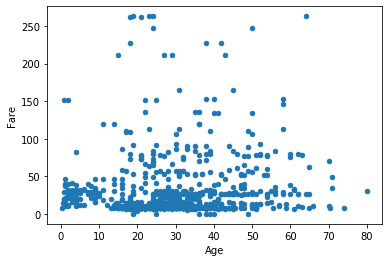

In [87]:
file.plot.scatter('Age','Fare')

# Replacing Outliers in Age with mean age values

In [93]:
file.loc[file['Age']>65,'Age']=np.mean(file['Age'])

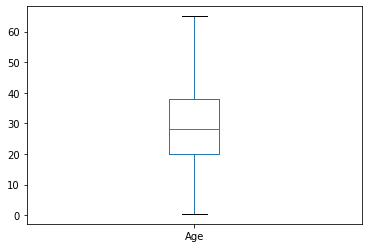

In [94]:
file['Age'].plot.box()

# Variable Transformation

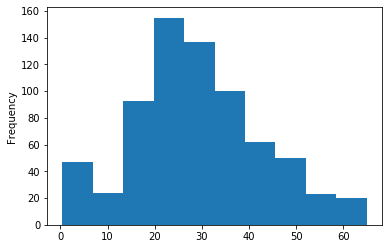

In [100]:
file['Age'].plot.hist()

In [101]:
#Right skewed since majority of the values are concentrated on the lower side and tail on the right side

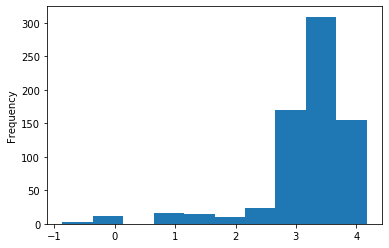

In [102]:
#Log Transformation
np.log(file['Age']).plot.hist()

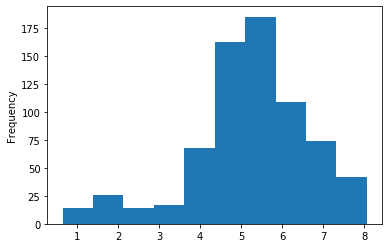

In [103]:
np.sqrt(file['Age']).plot.hist()

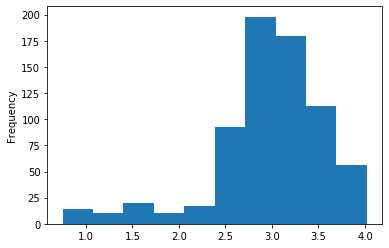

In [104]:
np.power(file['Age'],1/3).plot.hist()

In [106]:
#Comparitively Square root is a better one and symmetrical

# Binning

In [108]:
bins=[0,15,80]
group=['children','Adults']

In [109]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
file['type']=pd.cut(file['Age'],bins,labels=group)

In [112]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adults


In [113]:
file['type'].value_counts()

Adults      628
children     83
Name: type, dtype: int64